In [1]:

from __future__ import print_function
import numpy as np
import pandas as pd
import sys
sys.path.append("code")
from babyData import *
from babyARIMA import *
from babyHelper import *
import unicodedata
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Let us look as data
F  = get_data()


total files present in folder /Users/nomzee7/Documents/BabyNames/data: 139

first file name yob1880.txt

last file name yob2018.txt


In [3]:
df = read_files(F)

appending:  yob1881.txt
appending:  yob1882.txt
appending:  yob1883.txt
appending:  yob1884.txt
appending:  yob1885.txt
appending:  yob1886.txt
appending:  yob1887.txt
appending:  yob1888.txt
appending:  yob1889.txt
appending:  yob1890.txt
appending:  yob1891.txt
appending:  yob1892.txt
appending:  yob1893.txt
appending:  yob1894.txt
appending:  yob1895.txt
appending:  yob1896.txt
appending:  yob1897.txt
appending:  yob1898.txt
appending:  yob1899.txt
appending:  yob1900.txt
appending:  yob1901.txt
appending:  yob1902.txt
appending:  yob1903.txt
appending:  yob1904.txt
appending:  yob1905.txt
appending:  yob1906.txt
appending:  yob1907.txt
appending:  yob1908.txt
appending:  yob1909.txt
appending:  yob1910.txt
appending:  yob1911.txt
appending:  yob1912.txt
appending:  yob1913.txt
appending:  yob1914.txt
appending:  yob1915.txt
appending:  yob1916.txt
appending:  yob1917.txt
appending:  yob1918.txt
appending:  yob1919.txt
appending:  yob1920.txt
appending:  yob1921.txt
appending:  yob1

In [4]:
#Quick Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 5 columns):
name      object
sex       object
number    int64
year      int64
rank      int64
dtypes: int64(3), object(2)
memory usage: 89.6+ MB


In [5]:
#quick describe()
df.describe()

,number,year,rank
count,1.957046e+06,1.957046e+06,1.957046e+06
mean,1.796856e+02,1.975563e+03,1.051641e+04
std,1.522804e+03,3.419121e+01,8.421040e+03
min,5.000000e+00,1.880000e+03,0.000000e+00
25%,7.000000e+00,1.952000e+03,3.683000e+03
50%,1.200000e+01,1.985000e+03,8.257000e+03
75%,3.200000e+01,2.004000e+03,1.577700e+04
max,9.968900e+04,2.018000e+03,3.507800e+04


In [6]:
df.head(10)

,name,sex,number,year,rank
0,Mary,F,7065,1880,0
1,Anna,F,2604,1880,1
2,Emma,F,2003,1880,2
3,Elizabeth,F,1939,1880,3
4,Minnie,F,1746,1880,4
5,Margaret,F,1578,1880,5
6,Ida,F,1472,1880,6
7,Alice,F,1414,1880,7
8,Bertha,F,1320,1880,8
9,Sarah,F,1288,1880,9


In [7]:
df.tail(10)

,name,sex,number,year,rank
32023,Zuber,M,5,2018,32023
32024,Zubeyr,M,5,2018,32024
32025,Zyell,M,5,2018,32025
32026,Zyheem,M,5,2018,32026
32027,Zykeem,M,5,2018,32027
32028,Zylas,M,5,2018,32028
32029,Zyran,M,5,2018,32029
32030,Zyrie,M,5,2018,32030
32031,Zyron,M,5,2018,32031
32032,Zzyzx,M,5,2018,32032


In [8]:
#Creating a Summary df
df_grp = df.groupby(['name', 'sex'], as_index=False)['number', 'rank'].mean()

In [11]:
df_grp.describe()

,number,rank
count,107973.000000,107973.000000
mean,36.089791,14895.978220
std,396.209807,8486.354936
min,5.000000,11.086957
25%,5.500000,8540.777778
50%,6.625000,13310.200000
75%,10.108696,19853.027778
max,37322.260870,35056.000000


In [12]:
import matplotlib.pyplot as plt

In [13]:
#Lets seperate the name and female names
df_M = df[df['sex']=='M']
df_F = df[df['sex']=='F']

Text(0,0.5,'Frequency')

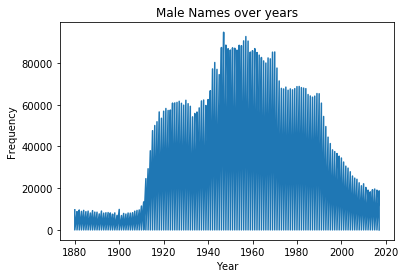

In [14]:
plt.plot(df_M['year'] ,df_M['number'])
plt.title("Male Names over years")
plt.xlabel("Year")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

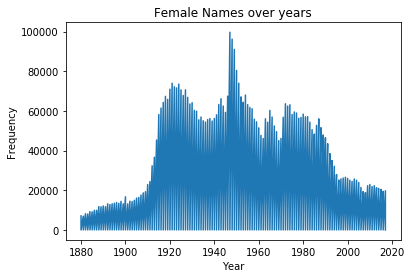

In [15]:
plt.plot(df_F['year'] ,df_F['number'])
plt.title("Female Names over years")
plt.xlabel("Year")
plt.ylabel("Frequency")

In [15]:
#Count of unique names across all years
print("Total number of Distinct Female name", df_F['name'].nunique())
print("Total number of Distinct Male name", df_M['name'].nunique())

Total number of Distinct Female name 67046
Total number of Distinct Male name 40927



 distribution before filtering 


 distribution after filtering 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924665 entries, 0 to 32468
Data columns (total 5 columns):
name      object
sex       object
number    int64
year      int64
rank      int64
dtypes: int64(3), object(2)
memory usage: 88.1+ MB

 data frame info before filtering 
 None

 .. filter in progress .. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113700 entries, 0 to 23410
Data columns (total 5 columns):
name      113700 non-null object
sex       113700 non-null object
number    113700 non-null int64
year      113700 non-null int64
rank      113700 non-null int64
dtypes: int64(3), object(2)
memory usage: 5.2+ MB

 data frame info after filtering 
 None

 shape of DS (array): (1036, 138)


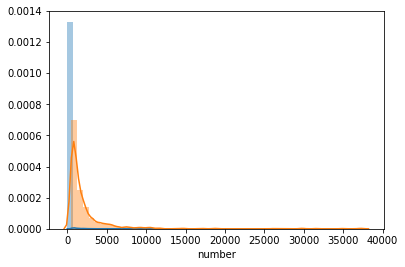

In [16]:
######################################################
############# ARIMA Model Data Prep ##################
######################################################
df_filt, filt = create_filt(df, 500)
#some manual wrangling, can be handled using try, except
filt_mod = filt[0:208] + filt[209:464] + filt[465:776] + filt[777:806] + filt[807:951] + filt[952:]
X = createX(filt_mod, df_filt, 1880, 2017)
print ('\n shape of DS (array):', X.shape)

In [17]:
############# Lets get the Forecast ############
#print(filt_mod )
F_2020 = scale_ARIMA_X(X, filt_mod)

generating forecast for: ('Aaliyah', 'F') i.e. 1 of 1036
604.9986657086595
generating forecast for: ('Aaron', 'M') i.e. 2 of 1036
4168.673802603315
generating forecast for: ('Abigail', 'F') i.e. 3 of 1036
2050.2576367094334
generating forecast for: ('Abraham', 'M') i.e. 4 of 1036
637.3391502031645
generating forecast for: ('Ada', 'F') i.e. 5 of 1036
714.6460249407716
generating forecast for: ('Adalynn', 'F') i.e. 6 of 1036
159.63679497689554
generating forecast for: ('Adam', 'M') i.e. 7 of 1036
4018.3599450898746
generating forecast for: ('Addison', 'F') i.e. 8 of 1036
879.5651668708515
generating forecast for: ('Addyson', 'F') i.e. 9 of 1036
95.87690248816105
generating forecast for: ('Adrian', 'M') i.e. 10 of 1036
1646.3161034305488
generating forecast for: ('Adriana', 'F') i.e. 11 of 1036
655.7962823127086
generating forecast for: ('Adrienne', 'F') i.e. 12 of 1036
485.2678847720037
generating forecast for: ('Agnes', 'F') i.e. 13 of 1036
1143.7607268261493
generating forecast for: ('

1499.6072267486509
generating forecast for: ('Bessie', 'F') i.e. 111 of 1036
1226.515461982226
generating forecast for: ('Beth', 'F') i.e. 112 of 1036
1152.04329344456
generating forecast for: ('Bethany', 'F') i.e. 113 of 1036
660.8153448098822
generating forecast for: ('Betty', 'F') i.e. 114 of 1036
7240.215103040482
generating forecast for: ('Beulah', 'F') i.e. 115 of 1036
530.7475715350045
generating forecast for: ('Beverly', 'F') i.e. 116 of 1036
2732.3230960235146
generating forecast for: ('Bianca', 'F') i.e. 117 of 1036
527.7657476994331
generating forecast for: ('Bill', 'M') i.e. 118 of 1036
1160.8121878564466
generating forecast for: ('Billie', 'F') i.e. 119 of 1036
735.3623880466027
generating forecast for: ('Billy', 'M') i.e. 120 of 1036
2766.659986623422
generating forecast for: ('Blake', 'M') i.e. 121 of 1036
1203.2702546461446
generating forecast for: ('Blanche', 'F') i.e. 122 of 1036
632.9512892660672
generating forecast for: ('Bob', 'M') i.e. 123 of 1036
674.665024603273

generating forecast for: ('Clinton', 'M') i.e. 222 of 1036
699.8883591758048
generating forecast for: ('Clyde', 'M') i.e. 223 of 1036
1046.3682284067288
generating forecast for: ('Cody', 'M') i.e. 224 of 1036
2016.4375961654189
generating forecast for: ('Cole', 'M') i.e. 225 of 1036
943.125225730413
generating forecast for: ('Colin', 'M') i.e. 226 of 1036
902.2517390705293
generating forecast for: ('Colleen', 'F') i.e. 227 of 1036
1173.1414218585196
generating forecast for: ('Collin', 'M') i.e. 228 of 1036
517.4419391062778
generating forecast for: ('Colton', 'M') i.e. 229 of 1036
783.0534379270404
generating forecast for: ('Conner', 'M') i.e. 230 of 1036
364.26450942594306
generating forecast for: ('Connie', 'F') i.e. 231 of 1036
1927.2832078462447
generating forecast for: ('Connor', 'M') i.e. 232 of 1036
1517.1258876243578
generating forecast for: ('Constance', 'F') i.e. 233 of 1036
1006.5611269556849
generating forecast for: ('Cooper', 'M') i.e. 234 of 1036
620.3478687063
generating

1636.430432851143
generating forecast for: ('Erick', 'M') i.e. 333 of 1036
512.7737534669316
generating forecast for: ('Erik', 'M') i.e. 334 of 1036
1105.9101150599786
generating forecast for: ('Erika', 'F') i.e. 335 of 1036
873.0298735786455
generating forecast for: ('Erin', 'F') i.e. 336 of 1036
2212.6652920923534
generating forecast for: ('Ernest', 'M') i.e. 337 of 1036
2176.8824177951833
generating forecast for: ('Esther', 'F') i.e. 338 of 1036
1885.671772138238
generating forecast for: ('Ethan', 'M') i.e. 339 of 1036
2658.0327414460435
generating forecast for: ('Ethel', 'F') i.e. 340 of 1036
2023.087043336061
generating forecast for: ('Eugene', 'M') i.e. 341 of 1036
2738.69163505037
generating forecast for: ('Eunice', 'F') i.e. 342 of 1036
573.419677003566
generating forecast for: ('Eva', 'F') i.e. 343 of 1036
1912.1692807072618
generating forecast for: ('Evan', 'M') i.e. 344 of 1036
1505.139349174767
generating forecast for: ('Evelyn', 'F') i.e. 345 of 1036
4545.945602155032
gene

183.17525896614643
generating forecast for: ('Jace', 'M') i.e. 443 of 1036
435.7640577155576
generating forecast for: ('Jack', 'M') i.e. 444 of 1036
4971.742894144937
generating forecast for: ('Jackie', 'F') i.e. 445 of 1036
660.5572769644324
generating forecast for: ('Jackie', 'M') i.e. 446 of 1036
566.0971552160538
generating forecast for: ('Jackson', 'M') i.e. 447 of 1036
1076.7292716935085
generating forecast for: ('Jaclyn', 'F') i.e. 448 of 1036
354.90055989526985
generating forecast for: ('Jacob', 'M') i.e. 449 of 1036
5722.423417010649
generating forecast for: ('Jacqueline', 'F') i.e. 450 of 1036
3037.646458815194
generating forecast for: ('Jacquelyn', 'F') i.e. 451 of 1036
607.7488111880929
generating forecast for: ('Jada', 'F') i.e. 452 of 1036
382.659565194684
generating forecast for: ('Jade', 'F') i.e. 453 of 1036
603.3135816484976
generating forecast for: ('Jaden', 'M') i.e. 454 of 1036
548.8097029983822
generating forecast for: ('Jaiden', 'M') i.e. 455 of 1036
139.64382928

328.7767044219629
generating forecast for: ('Kai', 'M') i.e. 553 of 1036
439.5167596203803
generating forecast for: ('Kaiden', 'M') i.e. 554 of 1036
244.4973506021475
generating forecast for: ('Kailey', 'F') i.e. 555 of 1036
146.58413396866393
generating forecast for: ('Kaitlin', 'F') i.e. 556 of 1036
392.0590728146742
generating forecast for: ('Kaitlyn', 'F') i.e. 557 of 1036
966.4780336052593
generating forecast for: ('Kaleb', 'M') i.e. 558 of 1036
412.24705547847486
generating forecast for: ('Kameron', 'M') i.e. 559 of 1036
237.89189117943195
generating forecast for: ('Kamryn', 'F') i.e. 560 of 1036
147.45291549903823
generating forecast for: ('Kara', 'F') i.e. 561 of 1036
generating forecast for: ('Karen', 'F') i.e. 562 of 1036
7098.848947873098
generating forecast for: ('Kari', 'F') i.e. 563 of 1036
426.97712611594284
generating forecast for: ('Karina', 'F') i.e. 564 of 1036
392.94707831643746
generating forecast for: ('Karl', 'M') i.e. 565 of 1036
718.1146428667853
generating for

2413.0241295697047
generating forecast for: ('Lola', 'F') i.e. 665 of 1036
624.4800227382605
generating forecast for: ('London', 'F') i.e. 666 of 1036
34.841548655351374
generating forecast for: ('Londyn', 'F') i.e. 667 of 1036
1.8163600744145043
generating forecast for: ('Lonnie', 'M') i.e. 668 of 1036
674.6226158311428
generating forecast for: ('Loretta', 'F') i.e. 669 of 1036
1270.9544455094722
generating forecast for: ('Lori', 'F') i.e. 670 of 1036
2466.421191458868
generating forecast for: ('Lorraine', 'F') i.e. 671 of 1036
1513.4817063769124
generating forecast for: ('Louis', 'M') i.e. 672 of 1036
2881.7561025940945
generating forecast for: ('Louise', 'F') i.e. 673 of 1036
2432.5095397965383
generating forecast for: ('Lucas', 'M') i.e. 674 of 1036
1896.6027224315112
generating forecast for: ('Lucille', 'F') i.e. 675 of 1036
1661.945201737102
generating forecast for: ('Lucy', 'F') i.e. 676 of 1036
1509.9337850342133
generating forecast for: ('Luis', 'M') i.e. 677 of 1036
1970.2067

509.2266129643105
generating forecast for: ('Mya', 'F') i.e. 774 of 1036
297.5203704970687
generating forecast for: ('Nancy', 'F') i.e. 775 of 1036
7235.991445388491
generating forecast for: ('Naomi', 'F') i.e. 776 of 1036
1196.8483424956978
generating forecast for: ('Natalia', 'F') i.e. 777 of 1036
484.40412765588087
generating forecast for: ('Natalie', 'F') i.e. 778 of 1036
2296.851067875692
generating forecast for: ('Natasha', 'F') i.e. 779 of 1036
679.3533566956847
generating forecast for: ('Nathan', 'M') i.e. 780 of 1036
3655.075386952142
generating forecast for: ('Nathaniel', 'M') i.e. 781 of 1036
1715.0243521924426
generating forecast for: ('Neil', 'M') i.e. 782 of 1036
generating forecast for: ('Nellie', 'F') i.e. 783 of 1036
1082.4252324518695
generating forecast for: ('Nelson', 'M') i.e. 784 of 1036
generating forecast for: ('Nevaeh', 'F') i.e. 785 of 1036
528.3027311893225
generating forecast for: ('Nicholas', 'M') i.e. 786 of 1036
6499.544004705392
generating forecast for: 

905.1071342666816
generating forecast for: ('Sally', 'F') i.e. 886 of 1036
1478.9698012883223
generating forecast for: ('Sam', 'M') i.e. 887 of 1036
899.7459531193197
generating forecast for: ('Samantha', 'F') i.e. 888 of 1036
3814.6948999100164
generating forecast for: ('Samuel', 'M') i.e. 889 of 1036
5324.521778755635
generating forecast for: ('Sandra', 'F') i.e. 890 of 1036
6318.094534379652
generating forecast for: ('Sandy', 'F') i.e. 891 of 1036
499.953584839792
generating forecast for: ('Sara', 'F') i.e. 892 of 1036
3024.953546316506
generating forecast for: ('Sarah', 'F') i.e. 893 of 1036
7626.905498418719
generating forecast for: ('Sasha', 'F') i.e. 894 of 1036
255.7113356108032
generating forecast for: ('Savanna', 'F') i.e. 895 of 1036
203.65901654897914
generating forecast for: ('Savannah', 'F') i.e. 896 of 1036
1210.7751909118451
generating forecast for: ('Sawyer', 'M') i.e. 897 of 1036
348.6523167555016
generating forecast for: ('Scarlett', 'F') i.e. 898 of 1036
407.3698905

627.5587394112997
generating forecast for: ('Vera', 'F') i.e. 996 of 1036
1059.5975187068368
generating forecast for: ('Vernon', 'M') i.e. 997 of 1036
1054.9171277866933
generating forecast for: ('Veronica', 'F') i.e. 998 of 1036
1540.375408764216
generating forecast for: ('Vicki', 'F') i.e. 999 of 1036
1111.464235836864
generating forecast for: ('Vickie', 'F') i.e. 1000 of 1036
797.651254621213
generating forecast for: ('Vicky', 'F') i.e. 1001 of 1036
382.28770588386504
generating forecast for: ('Victor', 'M') i.e. 1002 of 1036
2273.1534723043223
generating forecast for: ('Victoria', 'F') i.e. 1003 of 1036
3539.33710127465
generating forecast for: ('Vincent', 'M') i.e. 1004 of 1036
2462.528007633246
generating forecast for: ('Viola', 'F') i.e. 1005 of 1036
954.7833934652742
generating forecast for: ('Violet', 'F') i.e. 1006 of 1036
1024.607703732565
generating forecast for: ('Virgil', 'M') i.e. 1007 of 1036
519.696684074535
generating forecast for: ('Virginia', 'F') i.e. 1008 of 1036


In [18]:
#Few line of code to get the top 20 names

df_fcst = pd.DataFrame(filt_mod, columns=['name', 'gender'])
df_fcst['fcst_2020'] = F_2020

#filter gender and remove na
df_fcst_f = df_fcst[(df_fcst.gender == 'F') & (df_fcst.fcst_2020 != 'na')]
df_fcst_m = df_fcst[(df_fcst.gender == 'M') & (df_fcst.fcst_2020 != 'na')]

#top20!
print ('\n top 20 - female! \n', df_fcst_f.sort_values(by='fcst_2020', ascending=False).head(20))
print ('\n top 20 - male! \n', df_fcst_m.sort_values(by='fcst_2020', ascending=False).head(20))


 top 20 - female! 
           name gender fcst_2020
726       Mary      F   29817.8
321  Elizabeth      F   11699.2
805   Patricia      F   11366.1
493   Jennifer      F   10565.4
656      Linda      F   10524.4
99     Barbara      F   10390.6
704   Margaret      F   9077.93
941      Susan      F   8113.15
295    Dorothy      F   8053.39
892      Sarah      F   7626.91
501    Jessica      F    7557.4
419      Helen      F   7366.78
113      Betty      F   7240.22
774      Nancy      F   7235.99
561      Karen      F   7098.85
659       Lisa      F   6973.65
67        Anna      F   6325.25
889     Sandra      F   6318.09
292      Donna      F   6021.54
875       Ruth      F   6006.02

 top 20 - male! 
              name gender fcst_2020
460         James      M   37298.5
521          John      M   36887.7
854        Robert      M     34902
751       Michael      M   30968.4
1018      William      M   29507.6
263         David      M   25760.9
533        Joseph      M   18771.1
847     

In [19]:
############# Clustering ############

#outlier analysis
#filter based on >=1990 and <2010

df_90s_00s = df[(df.year >= 1990) & (df.year <= 2009)]


 distribution before filtering 


 distribution after filtering 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588315 entries, 0 to 34701
Data columns (total 5 columns):
name      588315 non-null object
sex       588315 non-null object
number    588315 non-null int64
year      588315 non-null int64
rank      588315 non-null int64
dtypes: int64(3), object(2)
memory usage: 26.9+ MB

 data frame info before filtering 
 None

 .. filter in progress .. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20442 entries, 0 to 21115
Data columns (total 5 columns):
name      20442 non-null object
sex       20442 non-null object
number    20442 non-null int64
year      20442 non-null int64
rank      20442 non-null int64
dtypes: int64(3), object(2)
memory usage: 958.2+ KB

 data frame info after filtering 
 None


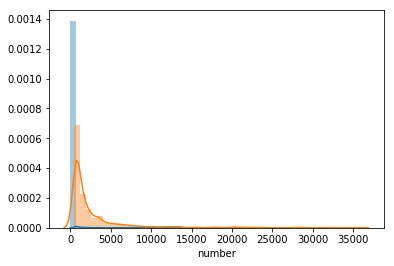

In [20]:
import warnings
warnings.filterwarnings("ignore")

df_90s_00s_filt, filt_90s_00s = create_filt(df_90s_00s, 500)

In [21]:
#preparing data for clustering 
X = merging(df_90s_00s_filt, filt_90s_00s)


 shape of DS (array): (1025, 20)


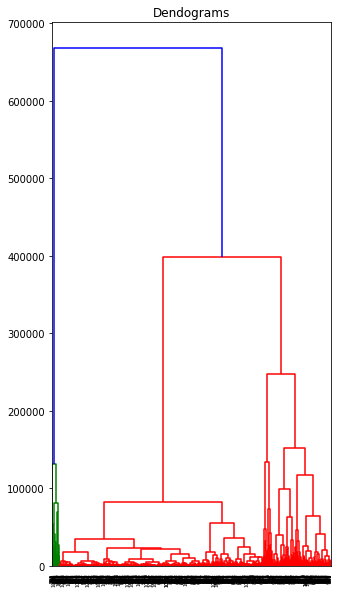

In [23]:
#dendogram to determine N
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(5, 10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
#Arbitrarily determined the cluster size to be 20, after trying out a few different values other than 4 as determined by dendogram

In [25]:
# Note: Dynamic Time Warping may be ideal for this data, I have used Hierarchical clustering for simplicity and baselining

N = 20 # 20 clusters#
cluster = AgglomerativeClustering(n_clusters=N, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(X)

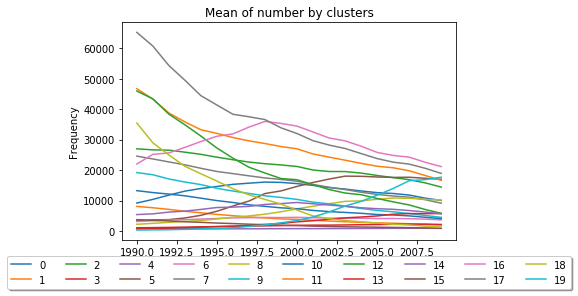

In [26]:
for i in range(N):
    key = 'cluster_'+str(i)
    #cluster_means[key] = np.mean(X[labels==i], axis =0)
    plt.plot(np.arange(1990,2010), np.mean(X[labels==i], axis =0), label=i)

plt.title('Mean of number by clusters')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [27]:
label_dict = {}
c=0
for i in filt_90s_00s:
    label_dict[i] = labels[c]
    c+=1

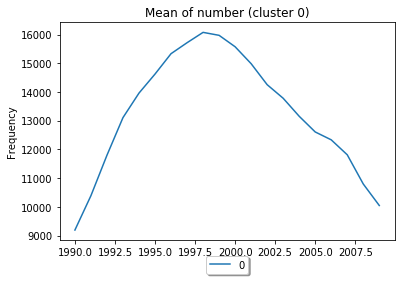

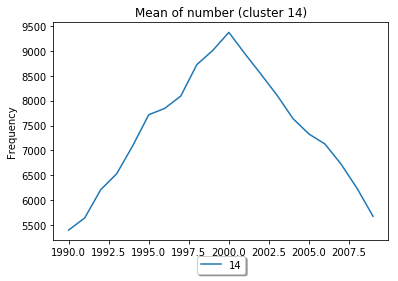

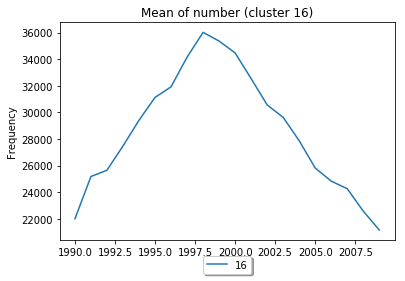

In [28]:
### FINDINGS 1 ###
### Cluster 0,6,14,16 is observed to have surged in popularity in the late 90s, only to drop in 00s

#plots
plot_findings(0, X, labels)
plot_findings(14, X, labels)
plot_findings(16, X, labels)



In [29]:
#names
print_findings(0, label_dict)
print_findings(14, label_dict)
print_findings(16, label_dict)


names in cluser 0

('Alexis', 'F')
('Alyssa', 'F')
('Austin', 'M')
('Benjamin', 'M')
('Christian', 'M')
('Dylan', 'M')
('Hannah', 'F')
('Jose', 'M')
('Nathan', 'M')
('Samuel', 'M')
('Taylor', 'F')

names in cluser 14

('Alex', 'M')
('Allison', 'F')
('Anna', 'F')
('Brianna', 'F')
('Cameron', 'M')
('Destiny', 'F')
('Haley', 'F')
('Hunter', 'M')
('Jason', 'M')
('Juan', 'M')
('Julia', 'F')
('Kaitlyn', 'F')
('Luis', 'M')
('Maria', 'F')
('Morgan', 'F')
('Sydney', 'F')

names in cluser 16

('Jacob', 'M')


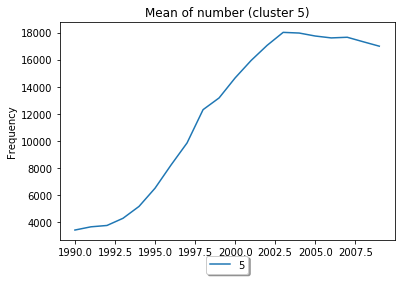

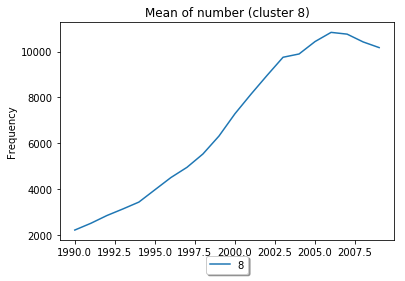

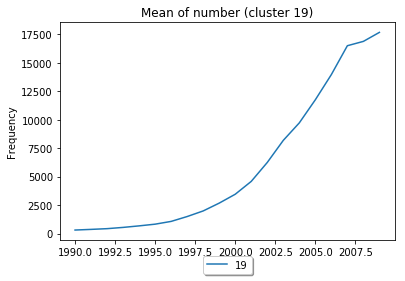

In [30]:
### FINDINGS 2 ###
### Cluster 5,8,19 are observed to have surged in popularity, of which 5 is very interesting!
### a. 4X increase between 90s and 00s
### b. looks like it'll become less popular with time

##plots
plot_findings(5,X, labels)
plot_findings(8, X, labels)
plot_findings(19, X, labels)


In [31]:
#names
print_findings(5, label_dict)
print_findings(8, label_dict)
print_findings(19, label_dict)



names in cluser 5

('Abigail', 'F')
('Emma', 'F')
('Ethan', 'M')
('Madison', 'F')
('Noah', 'M')
('Olivia', 'F')

names in cluser 8

('Aidan', 'M')
('Angel', 'M')
('Caleb', 'M')
('Chloe', 'F')
('Connor', 'M')
('Elijah', 'M')
('Evan', 'M')
('Gabriel', 'M')
('Gavin', 'M')
('Grace', 'F')
('Hailey', 'F')
('Isaac', 'M')
('Isaiah', 'M')
('Jack', 'M')
('Jackson', 'M')
('Logan', 'M')
('Luke', 'M')
('Mason', 'M')
('Mia', 'F')
('Natalie', 'F')

names in cluser 19

('Aiden', 'M')
('Ava', 'F')
('Isabella', 'F')
('Jayden', 'M')
('Sophia', 'F')


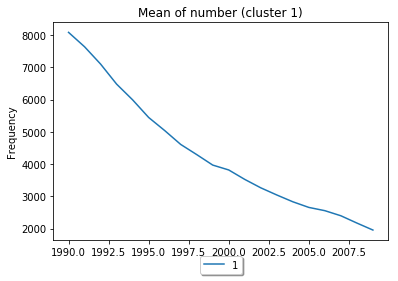

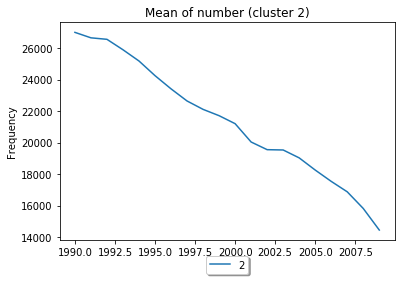

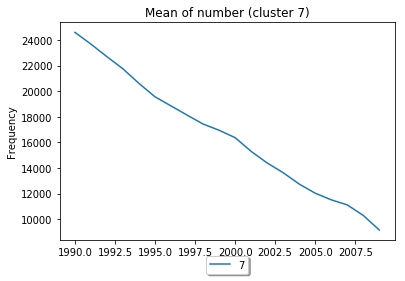

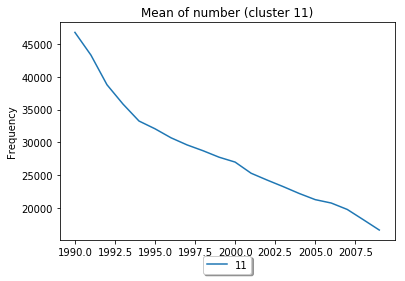

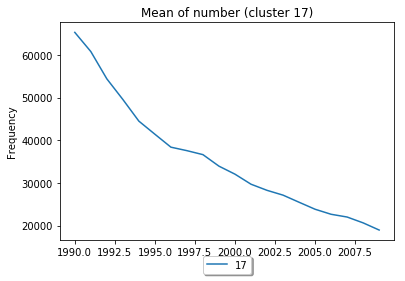

In [32]:
### FINDINGS 3 ###
### Cluster 1,2,7,17 are observed to have decreased in popularity

##plots
plot_findings(1, X, labels)
plot_findings(2, X, labels)
plot_findings(7, X, labels)
plot_findings(11, X, labels)
plot_findings(17, X, labels)


In [33]:
#names
print_findings(1, label_dict)
print_findings(2, label_dict)
print_findings(7, label_dict)
print_findings(11, label_dict)
print_findings(17, label_dict)


names in cluser 1

('Alicia', 'F')
('Amy', 'F')
('Andrea', 'F')
('Angela', 'F')
('Bradley', 'M')
('Caitlin', 'F')
('Cassandra', 'F')
('Catherine', 'F')
('Chelsea', 'F')
('Christina', 'F')
('Corey', 'M')
('Crystal', 'F')
('Derek', 'M')
('Dustin', 'M')
('Edward', 'M')
('Erica', 'F')
('Erin', 'F')
('George', 'M')
('Gregory', 'M')
('Heather', 'F')
('Jacqueline', 'F')
('Jared', 'M')
('Jeffrey', 'M')
('Jeremy', 'M')
('Jesse', 'M')
('Jordan', 'F')
('Kathryn', 'F')
('Katie', 'F')
('Kelly', 'F')
('Kelsey', 'F')
('Kenneth', 'M')
('Kimberly', 'F')
('Kristen', 'F')
('Laura', 'F')
('Lindsey', 'F')
('Marcus', 'M')
('Mark', 'M')
('Mary', 'F')
('Paul', 'M')
('Peter', 'M')
('Sara', 'F')
('Scott', 'M')
('Shane', 'M')
('Shawn', 'M')
('Shelby', 'F')
('Stephen', 'M')
('Taylor', 'M')
('Tiffany', 'F')
('Travis', 'M')
('Trevor', 'M')

names in cluser 2

('Alexander', 'M')
('Andrew', 'M')
('Anthony', 'M')
('Brandon', 'M')
('Daniel', 'M')
('David', 'M')
('Emily', 'F')
('James', 'M')
('John', 'M')
('Joseph', 'M

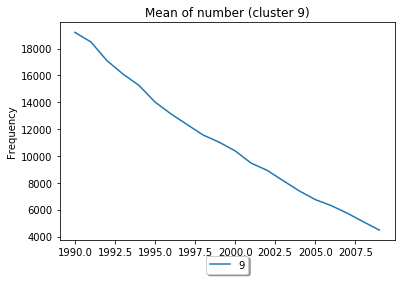

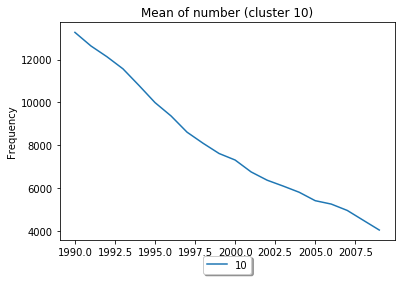

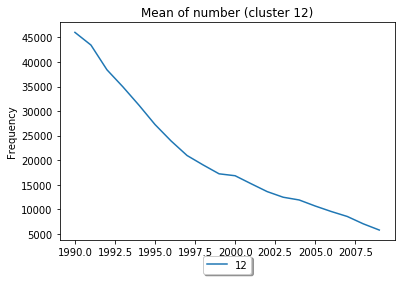

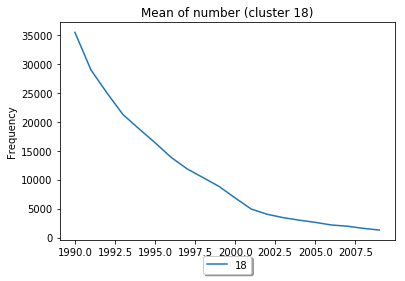

In [34]:
### FINDINGS 4 ###
### Cluster 9, 10, 11, 12, 18 are observed to have 'died' (drastically decreased) in popularity
### a. cluster 12 has decreased >10x
### b. cluster 18 has decreased >30x

## plots
plot_findings(9,X, labels)
plot_findings(10, X, labels)
plot_findings(12, X, labels)
plot_findings(18, X, labels)


In [35]:
#names
print_findings(9, label_dict)
print_findings(10,label_dict )
print_findings(12, label_dict)
print_findings(18,label_dict)


names in cluser 9

('Cody', 'M')
('Eric', 'M')
('Jennifer', 'F')
('Jordan', 'M')
('Kayla', 'F')
('Kyle', 'M')
('Lauren', 'F')
('Megan', 'F')
('Nicole', 'F')
('Rachel', 'F')
('Stephanie', 'F')
('Steven', 'M')
('Thomas', 'M')

names in cluser 10

('Aaron', 'M')
('Adam', 'M')
('Alexandra', 'F')
('Amber', 'F')
('Brian', 'M')
('Charles', 'M')
('Courtney', 'F')
('Danielle', 'F')
('Jasmine', 'F')
('Katherine', 'F')
('Melissa', 'F')
('Michelle', 'F')
('Patrick', 'M')
('Rebecca', 'F')
('Richard', 'M')
('Sean', 'M')
('Timothy', 'M')
('Victoria', 'F')

names in cluser 12

('Ashley', 'F')
('Jessica', 'F')

names in cluser 18

('Amanda', 'F')
('Brittany', 'F')
